In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from scipy.linalg import eigh

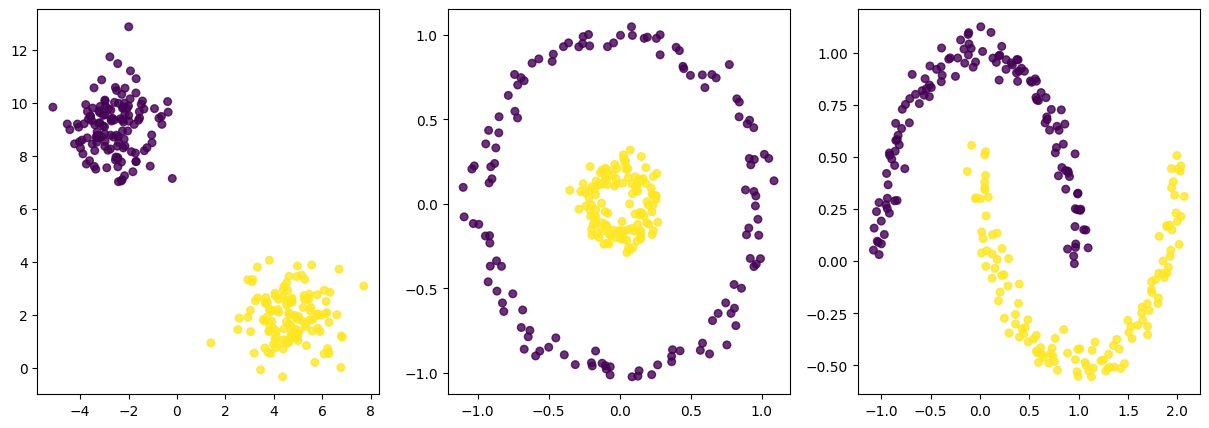

In [27]:
n_samples = 256
seed = 42
X_blob, Y_blob = datasets.make_blobs(n_samples=n_samples, centers=2 ,random_state=seed)
X_circle, Y_circle = datasets.make_circles(n_samples=n_samples, factor=0.2, noise=0.05, random_state=seed)
X_moon, Y_moon = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)

fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].scatter(X_blob[:, 0], X_blob[:, 1], c=Y_blob, cmap='viridis', s=30, alpha=0.8)
axs[1].scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, cmap='viridis', s=30, alpha=0.8)
axs[2].scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon, cmap='viridis', s=30, alpha=0.8)
plt.show()

In [34]:
def power_method(A, num_iter=200, tol=1e-6):
    n = A.shape[0]
    x_k = np.ones(n)

    for _ in range(num_iter):
        x_k = np.dot(A, x_k)
        x_k_norm = np.linalg.norm(x_k)
        x_k_next = x_k / x_k_norm

        # stopping criterion
        if np.linalg.norm(x_k_next - x_k) < tol: # the loop stops after a single iteration
            break
        x_k = x_k_next

    # Rayleigh quotient (only to perform the following convergence test)
    eig_val = np.dot(x_k.T, np.dot(A, x_k)) / np.dot(x_k.T, x_k)
    return eig_val, x_k

def deflate(A, eig_val, eig_vec):
    return A - eig_val * np.outer(eig_vec, eig_vec)
    
def change_dataset(X, Y, num_clusters=3):
    # matrices
    A = np.exp(-pairwise_distances(X, metric='euclidean'))
    D = np.diag(np.sum(A, axis=1))
    L = D - A
    L_inv = np.linalg.inv(L + np.eye(L.shape[0]) * 1e-6)
    L_inv_norm = L_inv / np.linalg.norm(L_inv)

    # power and deflation methods
    def_val = []
    def_vec = []
    def_mat = L_inv
    
    num_eig_pair = num_clusters # bear in mind that the first pair lacks the ability to group data
    
    for i in range(num_eig_pair):  
        eig_val, eig_vec = power_method(def_mat)
        def_val.append(eig_val)
        def_vec.append(eig_vec)
        def_mat = deflate(def_mat, eig_val, eig_vec)

    # visualization
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=30, alpha=0.8)
    axs[0].set_title('Original data')
    
    axs[1].scatter(np.zeros(len(def_vec[1])), def_vec[1], c=Y, cmap='viridis', s=30, alpha=0.8)
    axs[1].set_title('LE spanned by the 2nd eigenvector')
    
    axs[2].scatter(def_vec[1], def_vec[2], c=Y, cmap='viridis', s=30, alpha=0.8)
    axs[2].set_title('LE spanned by the 2nd and 3rd eigenvectors')
    axs[2].set_xlabel('2nd eigenvector')
    axs[2].set_ylabel('3rd eigenvector')
    
    fig.suptitle('Data embedded on LE')
    plt.tight_layout()
    plt.show()

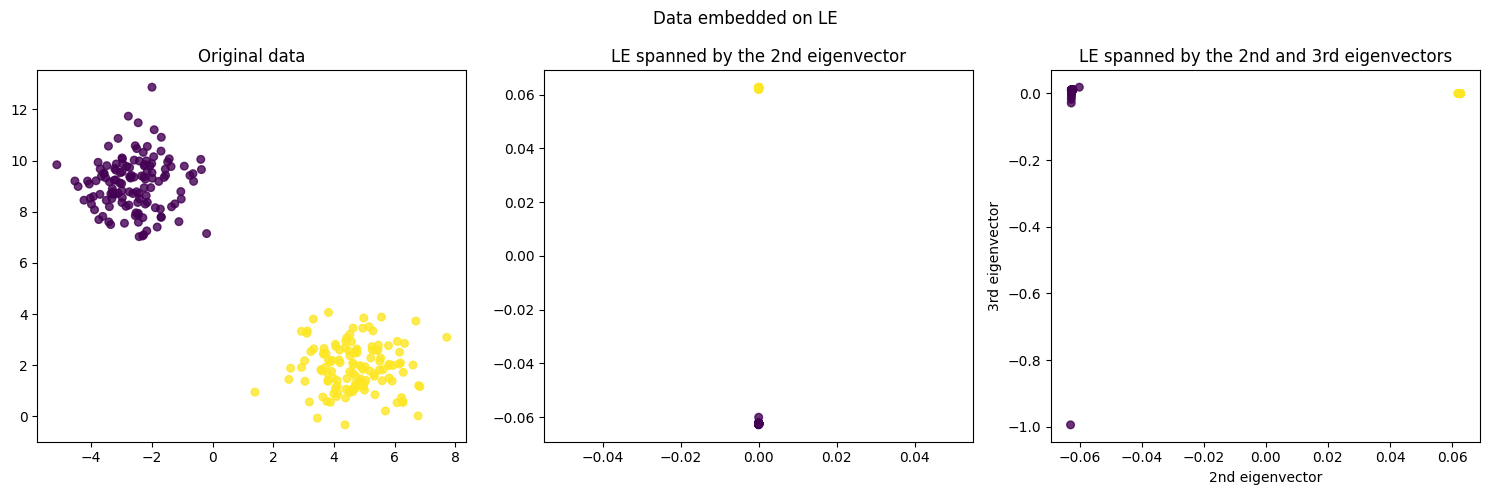

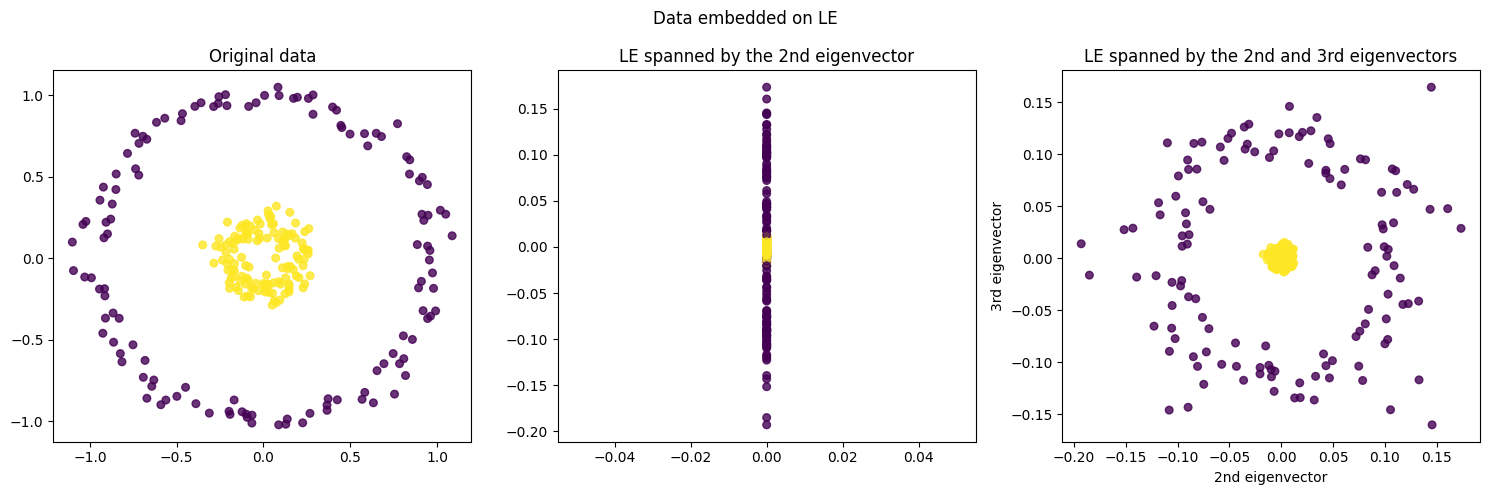

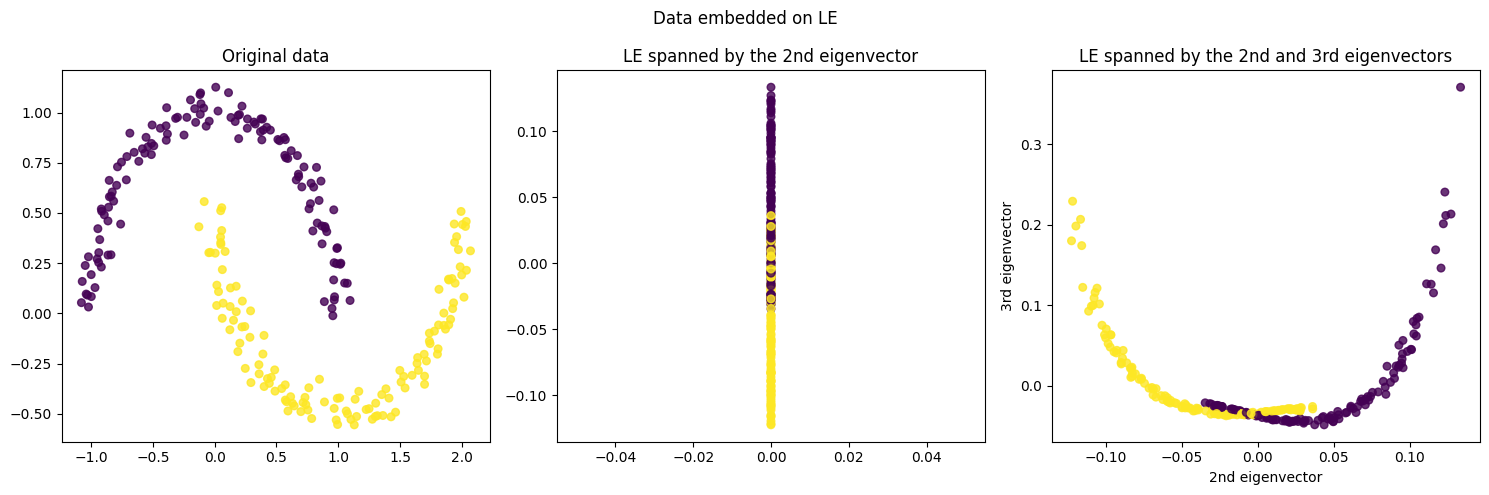

In [35]:
change_dataset(X_blob, Y_blob)
change_dataset(X_circle, Y_circle)
change_dataset(X_moon, Y_moon)

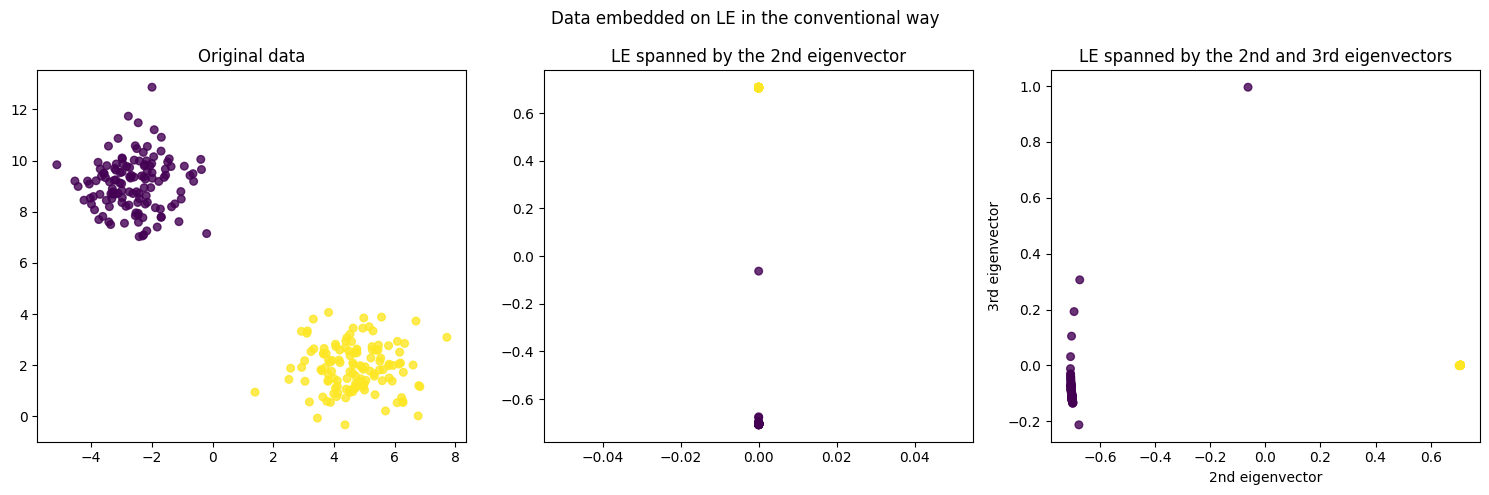

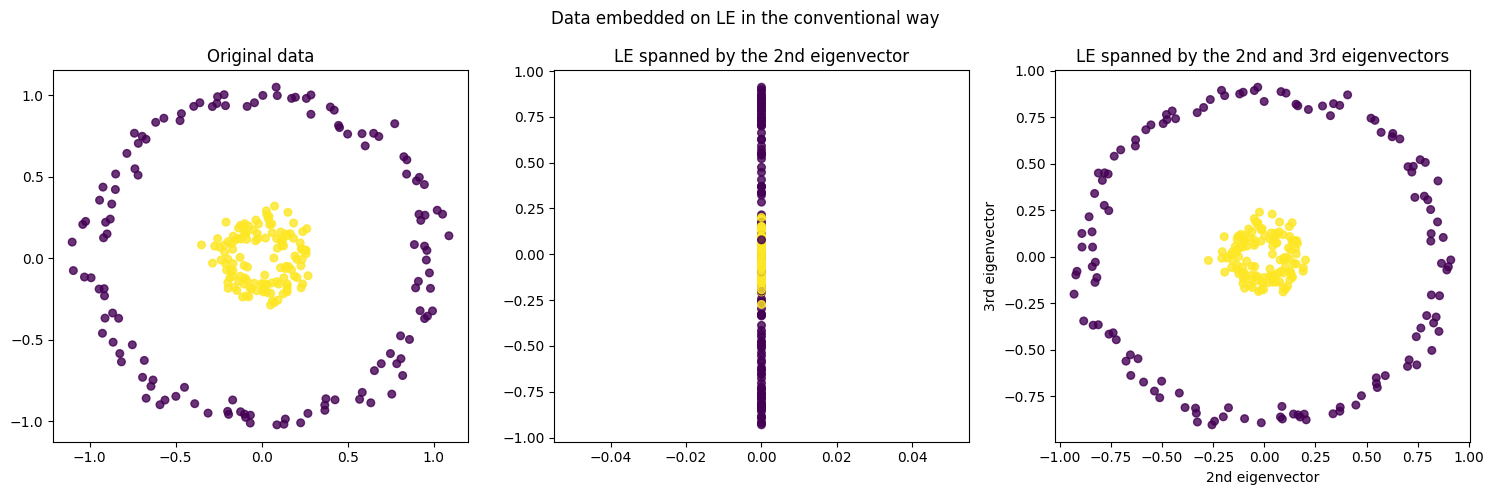

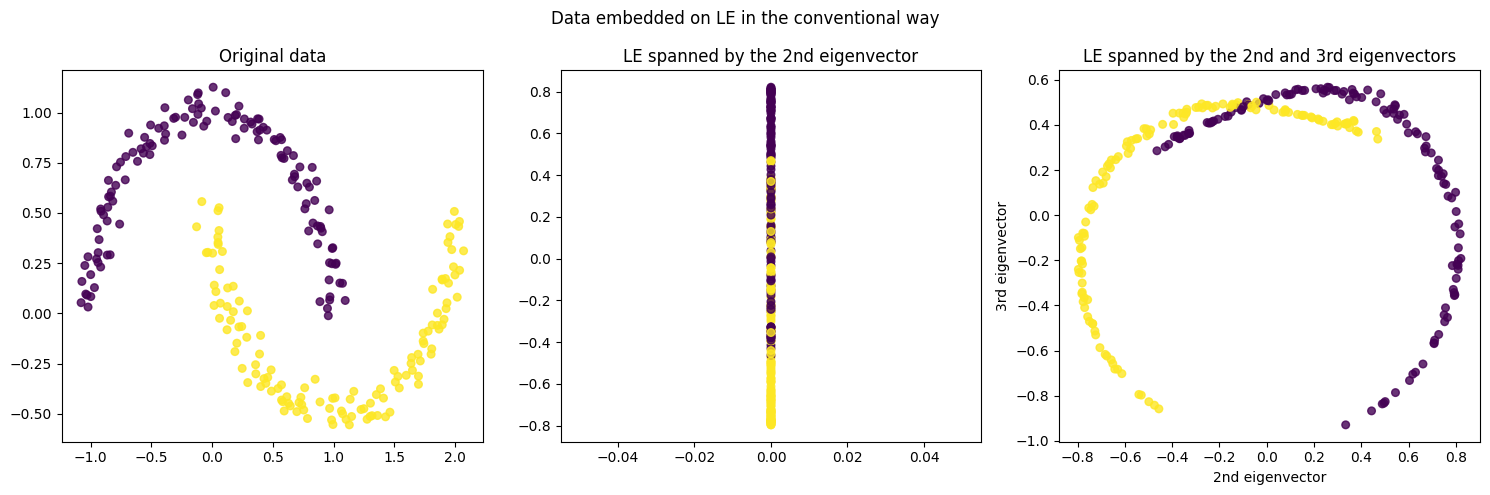

In [38]:
# comparision with the conventional way
def change_dataset_conv(X, Y, num_clusters=3):
    # matrices
    A = np.exp(-pairwise_distances(X, metric='euclidean'))
    D = np.diag(np.sum(A, axis=1))
    L = D - A
    val, vec = eigh(L)
    Z = normalize(vec[:, :3])

    # visualization
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=30, alpha=0.8)
    axs[0].set_title('Original data')
    
    axs[1].scatter(np.zeros(len(Z[:, 1])), Z[:, 1], c=Y, cmap='viridis', s=30, alpha=0.8)
    axs[1].set_title('LE spanned by the 2nd eigenvector')
    
    axs[2].scatter(Z[:, 1], Z[:, 2], c=Y, cmap='viridis', s=30, alpha=0.8)
    axs[2].set_title('LE spanned by the 2nd and 3rd eigenvectors')
    axs[2].set_xlabel('2nd eigenvector')
    axs[2].set_ylabel('3rd eigenvector')
    
    fig.suptitle('Data embedded on LE in the conventional way')
    plt.tight_layout()
    plt.show()

change_dataset_conv(X_blob, Y_blob)
change_dataset_conv(X_circle, Y_circle)
change_dataset_conv(X_moon, Y_moon)    